In [1]:
%matplotlib notebook
import pandas as pd
from gpr import GPR
from ipywidgets import interact, interactive, Button
import hublib.ui as ui
from IPython.display import display
from IPython.display import clear_output
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)
import matplotlib.pyplot as plt

## 1D Gaussian Process Regression Notebook Demo

Notebook version by Martin Hunt (mmh@purdue.edu)

Original Author

    Ilias Bilionis (ibilion@purdue.edu)
    PredictiveScience Lab
    School of Mechanical Engineering
    Purdue University, West Lafayette, IN, USA

Powered by [The excellent GPy package from the University of Sheffield](http://sheffieldml.github.io/GPy/).



## Chose a two-column data file below. Otherwise, test data will be displayed

In [2]:
desc = "Data file with 2 columns of numbers.  No header. Seperator will be automatically detected."
f = ui.FileUpload("Data File", desc)
f

In [3]:
w = None

def go_gpr(data):
    global w
    if w is not None:
        w.close()
    plt.figure(num='This is the title')
    g = GPR(data['x'], data['y'])
    w = interactive(g.run, 
        variance=(0.001,10.0,.001), 
        length_scale=(0.001,10.0,.001), 
        noise_variance=(0.001,10.0,.001));
    display(w)

In [4]:
def load_file(f):
    global grid
    if f is None or f.name == '':
        name = 'test.dat'
    else:
        name = 'TESTDAT.DAT'
        f.save(name)
    data = pd.read_csv(name, sep=None, names = ['x', 'y'], engine='python')
    go_gpr(data)

<IPython.core.display.Javascript object>


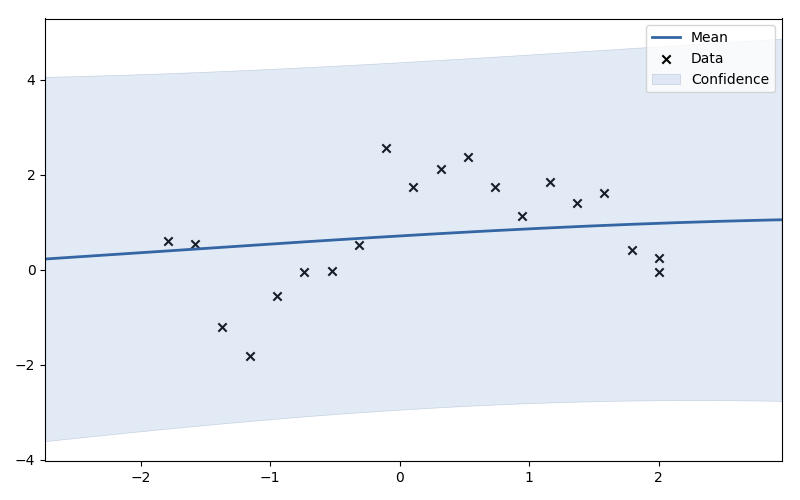

In [5]:
# create button that reloads things when clicked
button = Button(description="Load Data File")
def on_button_clicked(b):
    global f
    load_file(f)

button.on_click(on_button_clicked)

display(button)
load_file(None)